In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('stock_data/DJIA_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-12-28,12510.570313,12529.879883,12478.129883,12501.519531,12501.519531,126740000
1,2006-12-29,12500.480469,12526.030273,12451.129883,12463.150391,12463.150391,161560000
2,2007-01-03,12459.540039,12580.349609,12404.820313,12474.519531,12474.519531,327200000
3,2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
4,2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000


In [3]:
df = df[['Date','Close','Volume']]
df

,Date,Close,Volume
0,2006-12-28,12501.519531,126740000
1,2006-12-29,12463.150391,161560000
2,2007-01-03,12474.519531,327200000
3,2007-01-04,12480.690430,259060000
4,2007-01-05,12398.009766,235220000
...,...,...,...
2514,2016-12-22,19918.880859,258290000
2515,2016-12-23,19933.810547,158260000
2516,2016-12-27,19945.039063,158540000
2517,2016-12-28,19833.679688,188350000


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2519 non-null   datetime64[ns]
 1   Close   2519 non-null   float64       
 2   Volume  2519 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.2 KB


In [5]:
idx = pd.date_range('2006-12-28','2016-12-31')
idx

DatetimeIndex(['2006-12-28', '2006-12-29', '2006-12-30', '2006-12-31',
               '2007-01-01', '2007-01-02', '2007-01-03', '2007-01-04',
               '2007-01-05', '2007-01-06',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=3657, freq='D')

In [6]:
df = df.set_index('Date')
df

,Close,Volume
Date,,
2006-12-28,12501.519531,126740000
2006-12-29,12463.150391,161560000
2007-01-03,12474.519531,327200000
2007-01-04,12480.690430,259060000
2007-01-05,12398.009766,235220000
...,...,...
2016-12-22,19918.880859,258290000
2016-12-23,19933.810547,158260000
2016-12-27,19945.039063,158540000


In [7]:
df = df.reindex(idx)
df

,Close,Volume
2006-12-28,12501.519531,126740000.0
2006-12-29,12463.150391,161560000.0
2006-12-30,NaN,NaN
2006-12-31,NaN,NaN
2007-01-01,NaN,NaN
...,...,...
2016-12-27,19945.039063,158540000.0
2016-12-28,19833.679688,188350000.0
2016-12-29,19819.779297,172040000.0
2016-12-30,NaN,NaN


In [8]:
df = df.interpolate()
df

,Close,Volume
2006-12-28,12501.519531,126740000.0
2006-12-29,12463.150391,161560000.0
2006-12-30,12465.424219,194688000.0
2006-12-31,12467.698047,227816000.0
2007-01-01,12469.971875,260944000.0
...,...,...
2016-12-27,19945.039063,158540000.0
2016-12-28,19833.679688,188350000.0
2016-12-29,19819.779297,172040000.0
2016-12-30,19819.779297,172040000.0


In [9]:
df = df.reset_index()

In [10]:
df.columns=['Date','Close','Volume']

In [11]:
df.to_csv('stock_data/DJIA_adj_ver01.csv', index=False)

In [1]:
import pandas as pd
import json

In [2]:
year = 2007
month = 1

In [3]:
file_str = 'stock_data/nytimes'+str(year)+'-{:02}'.format(month)+'.json'

In [4]:
file_str

'stock_data/nytimes2007-01.json'

In [5]:
NYT_final = pd.DataFrame()
years = range(2007,2017)
months = range(1,13)

for year in years:
    for month in months:
        file_str = 'stock_data/nytimes'+str(year)+'-{:02}'.format(month)+'.json'

        with open(file_str) as f:
            NYT = json.load(f)
            NYT = NYT['response']['docs']
            main_df = pd.DataFrame()
            for n in NYT:
                try:
                    agg_dict = {'headline': [n['headline']['main']],
                                'type_of_material': [n['type_of_material']],
                                'abstract': [n['abstract'].replace(' [...]','')],
                                'pub_date': [n['pub_date']],
                                'section' : [n['section_name']]}
                except:
                    continue
                main_df = pd.concat([main_df, pd.DataFrame(agg_dict)])
            NYT_final=pd.concat([NYT_final, main_df])

In [6]:
NYT_final = NYT_final.reset_index(drop=True)
NYT_final['pub_date'] = pd.to_datetime(NYT_final['pub_date'].str[:10])
NYT_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620169 entries, 0 to 620168
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   headline          620169 non-null  object        
 1   type_of_material  620156 non-null  object        
 2   abstract          620169 non-null  object        
 3   pub_date          620169 non-null  datetime64[ns]
 4   section           605040 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 23.7+ MB


In [7]:
NYT_final

,headline,type_of_material,abstract,pub_date,section
0,The View From Boston,Blog,The Jets hardly had the most challenging sched...,2007-01-01,Sports
1,"Washington Irving, Political Cudgel",Blog,Governor Spitzer said in his inaugural address...,2007-01-01,N.Y./Region
2,"Out With the Old, In With the New",Blog,"Governor Eliot Spitzer and his wife, Silda, cl...",2007-01-01,N.Y./Region
3,Getting to Work Already,Blog,Governor Eliot Spitzer signed five executive o...,2007-01-01,N.Y./Region
4,The Eliot Dash,Blog,The sky was pitch black and a steady rain was ...,2007-01-01,N.Y./Region
...,...,...,...,...,...
620164,"A Long Wait for the Second Avenue Subway, but ...",News,Second Avenue Subway will have its inaugural r...,2016-12-29,N.Y. / Region
620165,Friday Night Music: Lone Bellow,Blog,A night of Brooklyn country music.,2016-12-30,Opinion
620166,What We&#8217;re Reading: The Direct Approach,Blog,Get recommendations from New York Times report...,2016-12-30,Blogs
620167,1966: China&#8217;s First Lady Admits She Plot...,Blog,"Liu Shao-chi, the wife of China’s chief of sta...",2016-12-30,World


In [8]:
NYT_final.to_pickle('stock_data/pickled_NYT.pkl')

In [3]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/moon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
df = pd.read_pickle('stock_data/pickled_NYT.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605027 entries, 0 to 620168
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   headline          605027 non-null  object        
 1   type_of_material  605027 non-null  object        
 2   abstract          605027 non-null  object        
 3   pub_date          605027 non-null  datetime64[ns]
 4   section           605027 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 27.7+ MB


In [5]:
df['headline'] = df['headline'] + ' '+ df['abstract']

In [6]:
sent = SentimentIntensityAnalyzer()

In [7]:
sent = SentimentIntensityAnalyzer()
sent_head = df['headline'].apply(sent.polarity_scores)

In [8]:
sent_head = pd.DataFrame.from_records(sent_head.values, index=sent_head.index)
sent_head['pub_date'] = df['pub_date']
sent_head = sent_head.groupby('pub_date').mean()

In [9]:
sent_head.index = sent_head.index + pd.Timedelta(days=1)
sent_head

,neg,neu,pos,compound
pub_date,,,,
2007-01-02,0.069864,0.861136,0.069091,0.151495
2007-01-03,0.058939,0.853915,0.087122,0.178637
2007-01-04,0.070704,0.857378,0.071918,0.052613
2007-01-05,0.040126,0.872667,0.087198,0.228902
2007-01-06,0.055274,0.865779,0.078929,0.101673
...,...,...,...,...
2016-12-27,0.069263,0.851158,0.079526,0.032974
2016-12-28,0.087544,0.800140,0.112281,0.076089
2016-12-29,0.122357,0.762929,0.114821,-0.122968


In [10]:
main_df = pd.read_csv('stock_data/DJIA_adj_ver01.csv')
main_df.head()

,Date,Close,Volume
0,2006-12-28,12501.519531,126740000.0
1,2006-12-29,12463.150391,161560000.0
2,2006-12-30,12465.424219,194688000.0
3,2006-12-31,12467.698047,227816000.0
4,2007-01-01,12469.971875,260944000.0


In [11]:
main_df['Date'] = pd.to_datetime(main_df['Date'])
main_df = main_df.set_index('Date')
main_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3657 entries, 2006-12-28 to 2016-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3657 non-null   float64
 1   Volume  3657 non-null   float64
dtypes: float64(2)
memory usage: 85.7 KB


In [12]:
main_df = main_df.join(sent_head, how='left')
main_df.head(10)

,Close,Volume,neg,neu,pos,compound
Date,,,,,,
2006-12-28,12501.519531,1.267400e+08,NaN,NaN,NaN,NaN
2006-12-29,12463.150391,1.615600e+08,NaN,NaN,NaN,NaN
2006-12-30,12465.424219,1.946880e+08,NaN,NaN,NaN,NaN
2006-12-31,12467.698047,2.278160e+08,NaN,NaN,NaN,NaN
2007-01-01,12469.971875,2.609440e+08,NaN,NaN,NaN,NaN
2007-01-02,12472.245703,2.940720e+08,0.069864,0.861136,0.069091,0.151495
2007-01-03,12474.519531,3.272000e+08,0.058939,0.853915,0.087122,0.178637
2007-01-04,12480.690430,2.590600e+08,0.070704,0.857378,0.071918,0.052613
2007-01-05,12398.009766,2.352200e+08,0.040126,0.872667,0.087198,0.228902


In [13]:
main_df.Close = main_df.Close.astype('int')
main_df.head()

,Close,Volume,neg,neu,pos,compound
Date,,,,,,
2006-12-28,12501,126740000.0,NaN,NaN,NaN,NaN
2006-12-29,12463,161560000.0,NaN,NaN,NaN,NaN
2006-12-30,12465,194688000.0,NaN,NaN,NaN,NaN
2006-12-31,12467,227816000.0,NaN,NaN,NaN,NaN
2007-01-01,12469,260944000.0,NaN,NaN,NaN,NaN


In [14]:
main_df.head(10)

,Close,Volume,neg,neu,pos,compound
Date,,,,,,
2006-12-28,12501,1.267400e+08,NaN,NaN,NaN,NaN
2006-12-29,12463,1.615600e+08,NaN,NaN,NaN,NaN
2006-12-30,12465,1.946880e+08,NaN,NaN,NaN,NaN
2006-12-31,12467,2.278160e+08,NaN,NaN,NaN,NaN
2007-01-01,12469,2.609440e+08,NaN,NaN,NaN,NaN
2007-01-02,12472,2.940720e+08,0.069864,0.861136,0.069091,0.151495
2007-01-03,12474,3.272000e+08,0.058939,0.853915,0.087122,0.178637
2007-01-04,12480,2.590600e+08,0.070704,0.857378,0.071918,0.052613
2007-01-05,12398,2.352200e+08,0.040126,0.872667,0.087198,0.228902


In [15]:
main_df.Close

Date
2006-12-28    12501
2006-12-29    12463
2006-12-30    12465
2006-12-31    12467
2007-01-01    12469
              ...  
2016-12-27    19945
2016-12-28    19833
2016-12-29    19819
2016-12-30    19819
2016-12-31    19819
Name: Close, Length: 3657, dtype: int64

In [16]:
temp = main_df[['Close']].copy()
temp.index = temp.index + pd.Timedelta(1, unit='D')
temp.columns = ['t_1']
main_df = main_df.join(temp, how='left')

In [17]:
temp = main_df[['Close']].copy()
temp.index = temp.index + pd.Timedelta(2, unit='D')
temp.columns = ['t_2']
main_df = main_df.join(temp, how='left')

In [18]:
temp = main_df[['Close']].copy()
temp.index = temp.index + pd.Timedelta(3, unit='D')
temp.columns = ['t_3']
main_df = main_df.join(temp, how='left')

In [19]:
temp = main_df[['Close']].copy()
temp.index = temp.index + pd.Timedelta(4, unit='D')
temp.columns = ['t_4']
main_df = main_df.join(temp, how='left')

In [20]:
temp = main_df[['Close']].copy()
temp.index = temp.index + pd.Timedelta(5, unit='D')
temp.columns = ['t_5']
main_df = main_df.join(temp, how='left')
main_df

,Close,Volume,neg,neu,pos,compound,t_1,t_2,t_3,t_4,t_5
Date,,,,,,,,,,,
2006-12-28,12501,126740000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-29,12463,161560000.0,NaN,NaN,NaN,NaN,12501.0,NaN,NaN,NaN,NaN
2006-12-30,12465,194688000.0,NaN,NaN,NaN,NaN,12463.0,12501.0,NaN,NaN,NaN
2006-12-31,12467,227816000.0,NaN,NaN,NaN,NaN,12465.0,12463.0,12501.0,NaN,NaN
2007-01-01,12469,260944000.0,NaN,NaN,NaN,NaN,12467.0,12465.0,12463.0,12501.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,19945,158540000.0,0.069263,0.851158,0.079526,0.032974,19942.0,19939.0,19936.0,19933.0,19918.0
2016-12-28,19833,188350000.0,0.087544,0.800140,0.112281,0.076089,19945.0,19942.0,19939.0,19936.0,19933.0
2016-12-29,19819,172040000.0,0.122357,0.762929,0.114821,-0.122968,19833.0,19945.0,19942.0,19939.0,19936.0


In [21]:
main_df.to_pickle('stock_data/main_df_ver01.pkl')

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
main_df = pd.read_pickle('stock_data/main_df_ver01.pkl')
main_df.head(10)

,Close,Volume,neg,neu,pos,compound,t_1,t_2,t_3,t_4,t_5
Date,,,,,,,,,,,
2006-12-28,12501,1.267400e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-29,12463,1.615600e+08,NaN,NaN,NaN,NaN,12501.0,NaN,NaN,NaN,NaN
2006-12-30,12465,1.946880e+08,NaN,NaN,NaN,NaN,12463.0,12501.0,NaN,NaN,NaN
2006-12-31,12467,2.278160e+08,NaN,NaN,NaN,NaN,12465.0,12463.0,12501.0,NaN,NaN
2007-01-01,12469,2.609440e+08,NaN,NaN,NaN,NaN,12467.0,12465.0,12463.0,12501.0,NaN
2007-01-02,12472,2.940720e+08,0.069864,0.861136,0.069091,0.151495,12469.0,12467.0,12465.0,12463.0,12501.0
2007-01-03,12474,3.272000e+08,0.058939,0.853915,0.087122,0.178637,12472.0,12469.0,12467.0,12465.0,12463.0
2007-01-04,12480,2.590600e+08,0.070704,0.857378,0.071918,0.052613,12474.0,12472.0,12469.0,12467.0,12465.0
2007-01-05,12398,2.352200e+08,0.040126,0.872667,0.087198,0.228902,12480.0,12474.0,12472.0,12469.0,12467.0


In [3]:
main_df = main_df.dropna()
main_df

,Close,Volume,neg,neu,pos,compound,t_1,t_2,t_3,t_4,t_5
Date,,,,,,,,,,,
2007-01-02,12472,2.940720e+08,0.069864,0.861136,0.069091,0.151495,12469.0,12467.0,12465.0,12463.0,12501.0
2007-01-03,12474,3.272000e+08,0.058939,0.853915,0.087122,0.178637,12472.0,12469.0,12467.0,12465.0,12463.0
2007-01-04,12480,2.590600e+08,0.070704,0.857378,0.071918,0.052613,12474.0,12472.0,12469.0,12467.0,12465.0
2007-01-05,12398,2.352200e+08,0.040126,0.872667,0.087198,0.228902,12480.0,12474.0,12472.0,12469.0,12467.0
2007-01-06,12406,2.313133e+08,0.055274,0.865779,0.078929,0.101673,12398.0,12480.0,12474.0,12472.0,12469.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,19945,1.585400e+08,0.069263,0.851158,0.079526,0.032974,19942.0,19939.0,19936.0,19933.0,19918.0
2016-12-28,19833,1.883500e+08,0.087544,0.800140,0.112281,0.076089,19945.0,19942.0,19939.0,19936.0,19933.0
2016-12-29,19819,1.720400e+08,0.122357,0.762929,0.114821,-0.122968,19833.0,19945.0,19942.0,19939.0,19936.0


In [4]:
train_end = '2014-12-31'
test_start = '2015-01-01'
train_x = main_df.loc[:train_end]
test_x = main_df.loc[test_start:]
train_y = train_x.Close
test_y = test_x.Close
train_x = train_x.drop(columns='Close')
test_x = test_x.drop(columns='Close')

In [5]:
rf = RandomForestRegressor()
rf.fit(train_x, train_y)

RandomForestRegressor()

In [6]:
pred = rf.predict(test_x)
pred = pd.DataFrame(data=pred, index=test_x.index, columns=['pred'])
pred

,pred
Date,
2015-01-01,17762.02
2015-01-02,17758.66
2015-01-03,17742.68
2015-01-04,17698.38
2015-01-05,17549.34
...,...
2016-12-27,17931.00
2016-12-28,17925.98
2016-12-29,17925.32


In [7]:
mean_squared_error(test_y, pred)

219707.0135712723

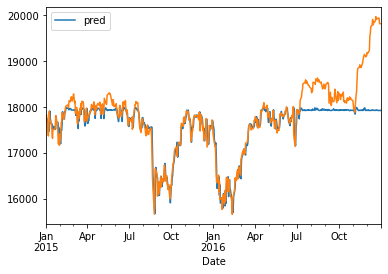

In [8]:
ax = pred.plot()
fig = test_y.plot(ax=ax)

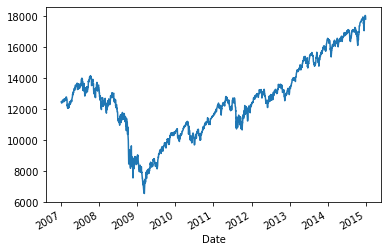

In [9]:
train_y.plot();

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
main_df = pd.read_pickle('stock_data/main_df_ver01.pkl')
main_df.head(10)

,Close,Volume,neg,neu,pos,compound,t_1,t_2,t_3,t_4,t_5
Date,,,,,,,,,,,
2006-12-28,12501,1.267400e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-29,12463,1.615600e+08,NaN,NaN,NaN,NaN,12501.0,NaN,NaN,NaN,NaN
2006-12-30,12465,1.946880e+08,NaN,NaN,NaN,NaN,12463.0,12501.0,NaN,NaN,NaN
2006-12-31,12467,2.278160e+08,NaN,NaN,NaN,NaN,12465.0,12463.0,12501.0,NaN,NaN
2007-01-01,12469,2.609440e+08,NaN,NaN,NaN,NaN,12467.0,12465.0,12463.0,12501.0,NaN
2007-01-02,12472,2.940720e+08,0.069864,0.861136,0.069091,0.151495,12469.0,12467.0,12465.0,12463.0,12501.0
2007-01-03,12474,3.272000e+08,0.058939,0.853915,0.087122,0.178637,12472.0,12469.0,12467.0,12465.0,12463.0
2007-01-04,12480,2.590600e+08,0.070704,0.857378,0.071918,0.052613,12474.0,12472.0,12469.0,12467.0,12465.0
2007-01-05,12398,2.352200e+08,0.040126,0.872667,0.087198,0.228902,12480.0,12474.0,12472.0,12469.0,12467.0


In [3]:
main_df = main_df.dropna()
main_df

,Close,Volume,neg,neu,pos,compound,t_1,t_2,t_3,t_4,t_5
Date,,,,,,,,,,,
2007-01-02,12472,2.940720e+08,0.069864,0.861136,0.069091,0.151495,12469.0,12467.0,12465.0,12463.0,12501.0
2007-01-03,12474,3.272000e+08,0.058939,0.853915,0.087122,0.178637,12472.0,12469.0,12467.0,12465.0,12463.0
2007-01-04,12480,2.590600e+08,0.070704,0.857378,0.071918,0.052613,12474.0,12472.0,12469.0,12467.0,12465.0
2007-01-05,12398,2.352200e+08,0.040126,0.872667,0.087198,0.228902,12480.0,12474.0,12472.0,12469.0,12467.0
2007-01-06,12406,2.313133e+08,0.055274,0.865779,0.078929,0.101673,12398.0,12480.0,12474.0,12472.0,12469.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,19945,1.585400e+08,0.069263,0.851158,0.079526,0.032974,19942.0,19939.0,19936.0,19933.0,19918.0
2016-12-28,19833,1.883500e+08,0.087544,0.800140,0.112281,0.076089,19945.0,19942.0,19939.0,19936.0,19933.0
2016-12-29,19819,1.720400e+08,0.122357,0.762929,0.114821,-0.122968,19833.0,19945.0,19942.0,19939.0,19936.0


In [4]:
main_df['target'] = main_df.Close - main_df.t_1
main_df

,Close,Volume,neg,neu,pos,compound,t_1,t_2,t_3,t_4,t_5,target
Date,,,,,,,,,,,,
2007-01-02,12472,2.940720e+08,0.069864,0.861136,0.069091,0.151495,12469.0,12467.0,12465.0,12463.0,12501.0,3.0
2007-01-03,12474,3.272000e+08,0.058939,0.853915,0.087122,0.178637,12472.0,12469.0,12467.0,12465.0,12463.0,2.0
2007-01-04,12480,2.590600e+08,0.070704,0.857378,0.071918,0.052613,12474.0,12472.0,12469.0,12467.0,12465.0,6.0
2007-01-05,12398,2.352200e+08,0.040126,0.872667,0.087198,0.228902,12480.0,12474.0,12472.0,12469.0,12467.0,-82.0
2007-01-06,12406,2.313133e+08,0.055274,0.865779,0.078929,0.101673,12398.0,12480.0,12474.0,12472.0,12469.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,19945,1.585400e+08,0.069263,0.851158,0.079526,0.032974,19942.0,19939.0,19936.0,19933.0,19918.0,3.0
2016-12-28,19833,1.883500e+08,0.087544,0.800140,0.112281,0.076089,19945.0,19942.0,19939.0,19936.0,19933.0,-112.0
2016-12-29,19819,1.720400e+08,0.122357,0.762929,0.114821,-0.122968,19833.0,19945.0,19942.0,19939.0,19936.0,-14.0


In [5]:
train_end = pd.to_datetime('2014-12-31')
test_start = train_end + pd.Timedelta(1, unit='D')
#test_start = pd.to_datetime('2015-01-01')
train_x = main_df.loc[:train_end]
test_x = main_df.loc[test_start:]
train_y = train_x.target
test_y = test_x.target
train_x = train_x.drop(columns=['Close','target'])
test_x = test_x.drop(columns=['Close','target'])

In [6]:
rf = RandomForestRegressor()
rf.fit(train_x, train_y)

RandomForestRegressor()

In [7]:
pred = rf.predict(test_x)
pred = pd.DataFrame(data=pred, index=test_x.index, columns=['pred'])
pred

,pred
Date,
2015-01-01,-102.49
2015-01-02,-82.16
2015-01-03,-70.44
2015-01-04,-90.21
2015-01-05,20.27
...,...
2016-12-27,-118.44
2016-12-28,-118.11
2016-12-29,-115.62


In [8]:
mean_squared_error(test_y,pred)

17743.130929548563

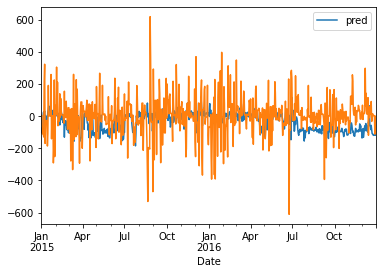

In [9]:
ax = pred.plot()
fig = test_y.plot(ax=ax)

<AxesSubplot:xlabel='Date'>

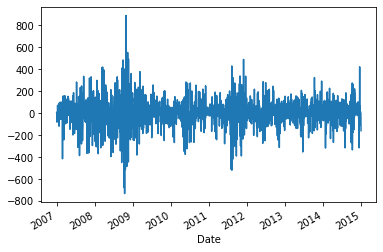

In [10]:
train_y.plot()

- 이동평균, 지수이동평균

In [7]:
main_df = main_df.drop(columns=['Close','t_1','t_2','t_3','t_4','t_5'])
main_df

,Volume,neg,neu,pos,compound,target
Date,,,,,,
2007-01-02,2.940720e+08,0.069864,0.861136,0.069091,0.151495,3.0
2007-01-03,3.272000e+08,0.058939,0.853915,0.087122,0.178637,2.0
2007-01-04,2.590600e+08,0.070704,0.857378,0.071918,0.052613,6.0
2007-01-05,2.352200e+08,0.040126,0.872667,0.087198,0.228902,-82.0
2007-01-06,2.313133e+08,0.055274,0.865779,0.078929,0.101673,8.0
...,...,...,...,...,...,...
2016-12-27,1.585400e+08,0.069263,0.851158,0.079526,0.032974,3.0
2016-12-28,1.883500e+08,0.087544,0.800140,0.112281,0.076089,-112.0
2016-12-29,1.720400e+08,0.122357,0.762929,0.114821,-0.122968,-14.0


In [8]:
# 이동평균(5일)
main_df.target.rolling(5).mean()

Date
2007-01-02     NaN
2007-01-03     NaN
2007-01-04     NaN
2007-01-05     NaN
2007-01-06   -12.6
              ... 
2016-12-27     5.4
2016-12-28   -20.0
2016-12-29   -23.4
2016-12-30   -24.0
2016-12-31   -24.6
Name: target, Length: 3651, dtype: float64

In [13]:
#지수이동평균(5일)
main_df.target.ewm(5).mean()

Date
2007-01-02     3.000000
2007-01-03     2.454545
2007-01-04     3.857143
2007-01-05   -23.780924
2007-01-06   -14.925177
                ...    
2016-12-27     8.768780
2016-12-28   -11.359350
2016-12-29   -11.799458
2016-12-30    -9.832882
2016-12-31    -8.194068
Name: target, Length: 3651, dtype: float64

In [14]:
moving_target = main_df[['target']].copy()
moving_target.index = moving_target.index + pd.Timedelta(1, unit='D')
moving_target.columns=['moving_target']
main_df = main_df.join(moving_target, how='left')
main_df

,Volume,neg,neu,pos,compound,target,moving_target
Date,,,,,,,
2007-01-02,2.940720e+08,0.069864,0.861136,0.069091,0.151495,3.0,NaN
2007-01-03,3.272000e+08,0.058939,0.853915,0.087122,0.178637,2.0,3.0
2007-01-04,2.590600e+08,0.070704,0.857378,0.071918,0.052613,6.0,2.0
2007-01-05,2.352200e+08,0.040126,0.872667,0.087198,0.228902,-82.0,6.0
2007-01-06,2.313133e+08,0.055274,0.865779,0.078929,0.101673,8.0,-82.0
...,...,...,...,...,...,...,...
2016-12-27,1.585400e+08,0.069263,0.851158,0.079526,0.032974,3.0,3.0
2016-12-28,1.883500e+08,0.087544,0.800140,0.112281,0.076089,-112.0,3.0
2016-12-29,1.720400e+08,0.122357,0.762929,0.114821,-0.122968,-14.0,-112.0


In [15]:
main_df['mw_5'] = main_df.moving_target.rolling(5).mean()
main_df.head(10)

,Volume,neg,neu,pos,compound,target,moving_target,mw_5
Date,,,,,,,,
2007-01-02,2.940720e+08,0.069864,0.861136,0.069091,0.151495,3.0,NaN,NaN
2007-01-03,3.272000e+08,0.058939,0.853915,0.087122,0.178637,2.0,3.0,NaN
2007-01-04,2.590600e+08,0.070704,0.857378,0.071918,0.052613,6.0,2.0,NaN
2007-01-05,2.352200e+08,0.040126,0.872667,0.087198,0.228902,-82.0,6.0,NaN
2007-01-06,2.313133e+08,0.055274,0.865779,0.078929,0.101673,8.0,-82.0,NaN
2007-01-07,2.274067e+08,0.059340,0.872128,0.068489,0.006738,8.0,8.0,-12.6
2007-01-08,2.235000e+08,0.037331,0.899293,0.063408,0.094220,9.0,8.0,-11.6
2007-01-09,2.251900e+08,0.048643,0.873921,0.077457,0.147461,-7.0,9.0,-10.2
2007-01-10,2.265700e+08,0.053961,0.875628,0.070419,0.102634,26.0,-7.0,-12.8


In [16]:
main_df['mw_20'] = main_df.moving_target.rolling(20).mean()
main_df['mw_60'] = main_df.moving_target.rolling(60).mean()
main_df['mw_120'] = main_df.moving_target.rolling(120).mean()
main_df['ewm_5'] = main_df.moving_target.ewm(5).mean()
main_df['ewm_20'] = main_df.moving_target.ewm(20).mean()
main_df['ewm_60'] = main_df.moving_target.ewm(60).mean()
main_df['ewm_120'] = main_df.moving_target.ewm(120).mean()
main_df = main_df.dropna()
main_df.head()

,Volume,neg,neu,pos,compound,target,moving_target,mw_5,mw_20,mw_60,mw_120,ewm_5,ewm_20,ewm_60,ewm_120
Date,,,,,,,,,,,,,,,
2007-08-20,231800000.0,0.083125,0.885188,0.031750,-0.185444,14.0,14.0,15.8,-12.55,-6.366667,1.333333,-3.787960,-12.467756,-3.871732,-0.367513
2007-08-21,204000000.0,0.071519,0.860716,0.067741,0.002267,-31.0,14.0,52.0,-4.50,-7.066667,1.566667,-0.823300,-11.207206,-3.571379,-0.227606
2007-08-22,205530000.0,0.045802,0.883173,0.071062,0.146036,146.0,-31.0,49.0,-13.60,-4.500000,1.425000,-5.852750,-12.149849,-4.032155,-0.526819
2007-08-23,198160000.0,0.060976,0.872702,0.066321,0.037035,-1.0,146.0,31.4,-11.35,-2.016667,2.358333,19.456042,-4.617925,-1.512771,0.895849
2007-08-24,186060000.0,0.069429,0.859593,0.070989,0.054604,143.0,-1.0,28.4,2.70,-1.983333,1.216667,16.046701,-4.445621,-1.504164,0.877468


In [17]:
train_end = pd.to_datetime('2014-12-31')
test_start = train_end + pd.Timedelta(1, unit='D')
#test_start = pd.to_datetime('2015-01-01')
train_x = main_df.loc[:train_end]
test_x = main_df.loc[test_start:]
train_y = train_x.target
test_y = test_x.target
train_x = train_x.drop(columns=['moving_target','target'])
test_x = test_x.drop(columns=['moving_target','target'])

In [18]:
rf = RandomForestRegressor()
rf.fit(train_x, train_y)

RandomForestRegressor()

In [19]:
pred = rf.predict(test_x)
pred = pd.DataFrame(data=pred, index=test_x.index, columns=['pred'])
pred

,pred
Date,
2015-01-01,13.40
2015-01-02,-3.58
2015-01-03,-6.97
2015-01-04,31.48
2015-01-05,-10.09
...,...
2016-12-27,-75.05
2016-12-28,-64.98
2016-12-29,-112.74


In [20]:
mean_squared_error(test_y,pred)

16091.785235430918

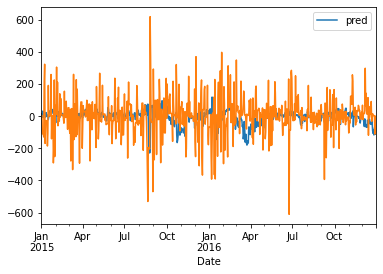

In [21]:
ax = pred.plot()
fig = test_y.plot(ax=ax)

- 분류문제로 변경

In [22]:
main_df['new_target'] = (main_df.target>0).astype('int')
main_df

/var/folders/vt/76d2nkdd2msb93lkngc6yv1r0000gn/T/ipykernel_1753/2053540350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['new_target'] = (main_df.target>0).astype('int')


,Volume,neg,neu,pos,compound,target,moving_target,mw_5,mw_20,mw_60,mw_120,ewm_5,ewm_20,ewm_60,ewm_120,new_target
Date,,,,,,,,,,,,,,,,
2007-08-20,231800000.0,0.083125,0.885188,0.031750,-0.185444,14.0,14.0,15.8,-12.55,-6.366667,1.333333,-3.787960,-12.467756,-3.871732,-0.367513,1
2007-08-21,204000000.0,0.071519,0.860716,0.067741,0.002267,-31.0,14.0,52.0,-4.50,-7.066667,1.566667,-0.823300,-11.207206,-3.571379,-0.227606,0
2007-08-22,205530000.0,0.045802,0.883173,0.071062,0.146036,146.0,-31.0,49.0,-13.60,-4.500000,1.425000,-5.852750,-12.149849,-4.032155,-0.526819,1
2007-08-23,198160000.0,0.060976,0.872702,0.066321,0.037035,-1.0,146.0,31.4,-11.35,-2.016667,2.358333,19.456042,-4.617925,-1.512771,0.895849,0
2007-08-24,186060000.0,0.069429,0.859593,0.070989,0.054604,143.0,-1.0,28.4,2.70,-1.983333,1.216667,16.046701,-4.445621,-1.504164,0.877468,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,158540000.0,0.069263,0.851158,0.079526,0.032974,3.0,3.0,0.2,34.55,29.550000,12.291667,9.922536,23.124210,17.825773,12.384723,1
2016-12-28,188350000.0,0.087544,0.800140,0.112281,0.076089,-112.0,3.0,5.4,19.80,29.733333,12.025000,8.768780,22.165915,17.582728,12.307163,0
2016-12-29,172040000.0,0.122357,0.762929,0.114821,-0.122968,-14.0,-112.0,-20.0,10.95,27.983333,11.491667,-11.359350,15.777062,15.458421,11.279831,0


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
train_end = pd.to_datetime('2014-12-31')
test_start = train_end + pd.Timedelta(1, unit='D')
#test_start = pd.to_datetime('2015-01-01')
train_x = main_df.loc[:train_end]
test_x = main_df.loc[test_start:]
train_y = train_x.new_target
test_y = test_x.new_target
train_x = train_x.drop(columns=['moving_target','target','new_target'])
test_x = test_x.drop(columns=['moving_target','target','new_target'])

In [25]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)

RandomForestClassifier()

In [26]:
pred = rf.predict(test_x)
pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [27]:
(pred == test_y).mean()

0.49794801641586867